In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, accuracy_score
from statsmodels.tsa.arima.model import ARIMA
statsmodels.tsa.statespace.sarimax import SARIMAX

#Load the clean data and the raw dataset which will be used for the model fitting.
raw_data = pd.read_csv("/Users/Lex/Documents/GitHub/TimeSeries_Project/Data/CovidSG_Latest_Data.csv")
Stationary_data = pd.read_csv("/Users/Lex/Documents/GitHub/TimeSeries_Project/Data/Clean_CovidSG_Data.csv")

#Assign x and y values
#Assign them into different Data Frames
#Set date as an index
X = Stationary_data.Date
y_confirmed = Stationary_data.Confirmed_1
y_discharged = Stationary_data.Discharges_1
y_localTransmission = Stationary_data.LocalTransmission_1

#Concatenate x and y data
Confirmed_data = pd.concat([X, y_confirmed], axis=1)
Discharged_data = pd.concat([X, y_discharged], axis=1)
LocalTransmission_data = pd.concat([X, y_localTransmission], axis=1)

Confirmed_data = Confirmed_data.set_index('Date')
Discharged_data = Discharged_data.set_index('Date')
LocalTransmission_data = LocalTransmission_data.set_index('Date')

In [2]:
print(Confirmed_data.shape[0])
print(Discharged_data.shape[0])
print(LocalTransmission_data.shape[0])

671
671
671


In [3]:
#Auto ARIMA Function using pmdarima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

def Optimal_ARIMA(dataset, name):
    print("Optimal Model for", name, ":")
    # Fit auto_arima function to each dataset
    stepwise_fit = auto_arima(dataset, start_p = 1, start_q = 1, d = 1,
                            max_p = 8, max_q = 8, max_d = 2, trace = True,
                            error_action ='ignore',   
                            suppress_warnings = True,  
                            stepwise = True)          

    # To print the summary
    stepwise_fit.summary()
    return stepwise_fit.summary()

In [4]:
#Call the method on each dataset to perform stepwise fit
#Confirmed Data
Optimal_ARIMA(dataset = Confirmed_data.Confirmed_1, name = "Confirmed Data")

Optimal Model for Confirmed Data :
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9923.896, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9575.788, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9921.897, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9427.547, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9296.406, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9281.467, Time=0.17 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=9256.695, Time=0.22 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=9138.096, Time=0.32 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=8943.709, Time=0.45 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=8944.696, Time=0.64 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=8943.953, Time=1.70 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=8964.733, Time=2.05 sec
 ARIMA(8

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  671
Model:               SARIMAX(7, 1, 3)   Log Likelihood               -4422.398
Date:                Fri, 17 Dec 2021   AIC                           8866.796
Time:                        00:06:56   BIC                           8916.376
Sample:                             0   HQIC                          8886.000
                                - 671                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2289      0.028    -44.330      0.000      -1.283      -1.175
ar.L2         -1.6070      0.039    -41.001      0.000      -1.684      -1.530
ar.L3         -1.2341      0.045    -27.183      0.000      -1.323      -1.145
ar.L4         -0.9878      0.049    -20.009      0.000      -1.085      -0.891
ar.L5         -0.9479      0.046    -20.717      0.000      -1.038      -0.858
ar.L6         -0.7290      0.033    -22.168      0.000      -0.793      -0.665
ar.L7         -0.3629      0.024    -15.409      0.000      -0.409      -0.317
ma.L1         -0.3331      0.028    -11.890      0.000      -0.388      -0.278
ma.L2          0.3887      0.026     15.195      0.000       0.339       0.439
ma.L3         -0.7734      0.024    -32.196      0.000      -0.820      -0.726
sigma2      3.571e+04    769.181     46.420      0.000    3.42e+04    3.72e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             14574.27
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               4.25   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
#Discharged Data
Optimal_ARIMA(dataset = Discharged_data.Discharges_1, name = "Discharged Data")

Optimal Model for Discharged Data :
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9887.256, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9577.790, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9885.258, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9410.233, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9303.692, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9262.158, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=9263.185, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=9260.185, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=9301.703, Time=0.10 sec
 ARIMA(5,1,0)(0,0,0)[0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  671
Model:               SARIMAX(4, 1, 0)   Log Likelihood               -4625.092
Date:                Fri, 17 Dec 2021   AIC                           9260.185
Time:                        00:07:03   BIC                           9282.721
Sample:                             0   HQIC                          9268.914
                                - 671                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1786      0.014    -81.856      0.000      -1.207      -1.150
ar.L2         -1.0274      0.020    -50.162      0.000      -1.068      -0.987
ar.L3         -0.6606      0.022    -30.593      0.000      -0.703      -0.618
ar.L4         -0.2525      0.015    -16.336      0.000      -0.283      -0.222
sigma2      5.821e+04    971.913     59.897      0.000    5.63e+04    6.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             15992.38
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              10.66   Skew:                             2.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
#Local Transmission Data
Optimal_ARIMA(dataset = LocalTransmission_data.LocalTransmission_1, name = "Local Transmission Data")

Optimal Model for Local Transmission Data :
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9923.181, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9574.427, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9921.182, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9426.267, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9294.751, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9279.740, Time=0.19 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=9255.062, Time=0.22 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=9136.242, Time=0.37 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=8941.920, Time=0.54 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=8942.842, Time=0.72 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=8942.054, Time=1.70 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=8962.540, Time=2.03 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  671
Model:               SARIMAX(7, 1, 3)   Log Likelihood               -4421.371
Date:                Fri, 17 Dec 2021   AIC                           8864.743
Time:                        00:07:58   BIC                           8914.323
Sample:                             0   HQIC                          8883.947
                                - 671                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2295      0.028    -44.603      0.000      -1.283      -1.175
ar.L2         -1.6081      0.039    -41.219      0.000      -1.685      -1.532
ar.L3         -1.2353      0.045    -27.308      0.000      -1.324      -1.147
ar.L4         -0.9894      0.049    -20.090      0.000      -1.086      -0.893
ar.L5         -0.9495      0.046    -20.781      0.000      -1.039      -0.860
ar.L6         -0.7293      0.033    -22.169      0.000      -0.794      -0.665
ar.L7         -0.3626      0.023    -15.440      0.000      -0.409      -0.317
ma.L1         -0.3326      0.028    -11.921      0.000      -0.387      -0.278
ma.L2          0.3910      0.025     15.425      0.000       0.341       0.441
ma.L3         -0.7764      0.024    -32.432      0.000      -0.823      -0.729
sigma2      3.562e+04    769.693     46.274      0.000    3.41e+04    3.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             14765.40
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               4.26   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
x_confirmed = raw_data.Daily_Confirmed
size = int(len(x_confirmed) * 0.80)
train_conf, test_conf = x_confirmed[size:], x_confirmed[:size]
history_1 = [xa for xa in train_conf]
predictions_1 = list()

# walk-forward validation
for t in range(len(test_conf)):
    model = ARIMA(history_1, order=(7, 1, 3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_1.append(yhat)
    obs = test_conf[t]
    history_1.append(obs)
    print('forecasted:%f, observed:%f' % (yhat, obs))
    
# evaluate forecasts
mse = mean_squared_error(test_conf, predictions_1)
rmse = np.sqrt(mean_squared_error(test_conf, predictions_1))
print('Mean Squared Error: %.2f' %mse)
print('Root Mean Square Error: %.2f' % rmse)

forecasted:1485.846082, observed:3.000000
forecasted:391.909946, observed:3.000000
forecasted:207.414974, observed:2.000000
forecasted:239.637339, observed:0.000000
forecasted:-145.112175, observed:0.000000
forecasted:22.822718, observed:6.000000
forecasted:-80.093093, observed:4.000000
forecasted:-524.746582, observed:2.000000
forecasted:-634.769799, observed:3.000000
forecasted:-308.955707, observed:7.000000
forecasted:80.515973, observed:3.000000
forecasted:223.754297, observed:2.000000
forecasted:153.963693, observed:2.000000
forecasted:-3.493799, observed:3.000000
forecasted:-109.660364, observed:8.000000
forecasted:-97.405613, observed:9.000000
forecasted:-12.904711, observed:5.000000
forecasted:58.170892, observed:3.000000
forecasted:69.385921, observed:2.000000
forecasted:28.531769, observed:4.000000
forecasted:-16.643072, observed:3.000000
forecasted:-32.923062, observed:1.000000
forecasted:-18.767518, observed:1.000000
forecasted:5.738396, observed:3.000000
forecasted:20.2876

forecasted:257.448832, observed:42.000000
forecasted:97.867648, observed:102.000000
forecasted:-29.189851, observed:83.000000
forecasted:-56.781753, observed:81.000000
forecasted:53.377708, observed:86.000000
forecasted:143.116991, observed:91.000000
forecasted:138.475203, observed:100.000000
forecasted:111.489274, observed:93.000000
forecasted:80.880733, observed:68.000000
forecasted:52.549038, observed:117.000000
forecasted:73.227185, observed:50.000000
forecasted:79.248002, observed:87.000000
forecasted:101.166915, observed:51.000000
forecasted:91.090748, observed:31.000000
forecasted:46.477804, observed:60.000000
forecasted:41.029893, observed:77.000000
forecasted:43.949761, observed:94.000000
forecasted:67.245071, observed:51.000000
forecasted:78.163713, observed:54.000000
forecasted:66.764600, observed:41.000000
forecasted:48.468570, observed:40.000000
forecasted:41.937823, observed:49.000000
forecasted:54.422394, observed:48.000000
forecasted:52.483021, observed:40.000000
foreca

forecasted:10.370609, observed:23.000000
forecasted:18.312984, observed:19.000000
forecasted:20.958428, observed:9.000000
forecasted:15.957482, observed:13.000000
forecasted:13.019251, observed:13.000000
forecasted:8.455388, observed:13.000000
forecasted:10.842685, observed:6.000000
forecasted:14.538465, observed:10.000000
forecasted:12.646794, observed:8.000000
forecasted:7.382548, observed:10.000000
forecasted:6.051192, observed:8.000000
forecasted:7.519080, observed:17.000000
forecasted:11.444076, observed:12.000000
forecasted:12.795909, observed:11.000000
forecasted:13.298422, observed:9.000000
forecasted:12.096297, observed:15.000000
forecasted:11.278773, observed:15.000000
forecasted:13.272940, observed:17.000000
forecasted:16.587559, observed:12.000000
forecasted:15.312490, observed:12.000000
forecasted:12.169499, observed:13.000000
forecasted:11.532758, observed:15.000000
forecasted:13.560173, observed:17.000000
forecasted:17.010113, observed:12.000000
forecasted:15.797696, obs

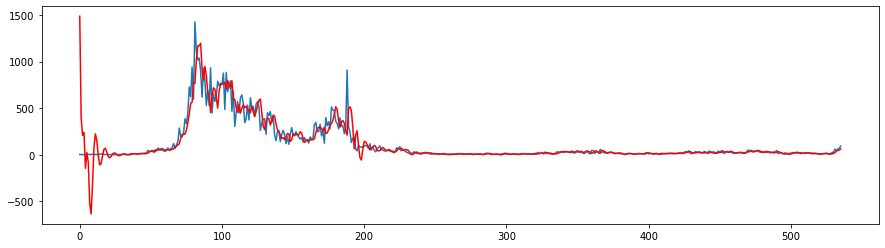

In [8]:
# plot forecasts against actual outcomes
plt.figure(figsize=(15,4))
plt.plot(test_conf)
plt.plot(predictions_1, color='red')
plt.show()

In [9]:
x_discharged = raw_data.Daily_Discharged
disc_size = int(len(x_discharged) * 0.80)
train_disc, test_disc = x_discharged[size:], x_discharged[:size]
history_2 = [xb for xb in train_disc]
predictions_2 = list()

# walk-forward validation
for t in range(len(test_disc)):
    model = ARIMA(history_2, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2.append(yhat)
    obs = test_disc[t]
    history_2.append(obs)
    print('forecasted:%f, observed:%f' % (yhat, obs))
    
# evaluate forecasts
mse = mean_squared_error(test_disc, predictions_2)
rmse = np.sqrt(mean_squared_error(test_disc, predictions_2))
print('Mean Squared Error: %.2f' %mse)
print('Root Mean Square Error: %.2f' % rmse)

forecasted:1686.976197, observed:0.000000
forecasted:854.433880, observed:0.000000
forecasted:399.243632, observed:0.000000
forecasted:86.432189, observed:0.000000
forecasted:-40.239018, observed:0.000000
forecasted:-0.000000, observed:1.000000
forecasted:0.558394, observed:0.000000
forecasted:0.208267, observed:0.000000
forecasted:0.168433, observed:1.000000
forecasted:0.650284, observed:0.000000
forecasted:0.181263, observed:4.000000
forecasted:2.401719, observed:1.000000
forecasted:1.483266, observed:2.000000
forecasted:1.971755, observed:6.000000
forecasted:4.302597, observed:0.000000
forecasted:1.570400, observed:2.000000
forecasted:2.284633, observed:1.000000
forecasted:1.472880, observed:1.000000
forecasted:0.941351, observed:5.000000
forecasted:3.351868, observed:5.000000
forecasted:4.038562, observed:5.000000
forecasted:4.739808, observed:3.000000
forecasted:3.991870, observed:10.000000
forecasted:7.374266, observed:2.000000
forecasted:4.029479, observed:2.000000
forecasted:3.

forecasted:312.207917, observed:472.000000
forecasted:394.906497, observed:432.000000
forecasted:405.637244, observed:397.000000
forecasted:412.540971, observed:183.000000
forecasted:282.644183, observed:277.000000
forecasted:284.066629, observed:309.000000
forecasted:288.644690, observed:532.000000
forecasted:424.905024, observed:269.000000
forecasted:329.746704, observed:244.000000
forecasted:295.357018, observed:423.000000
forecasted:377.087014, observed:230.000000
forecasted:266.568837, observed:155.000000
forecasted:213.979604, observed:168.000000
forecasted:194.083119, observed:198.000000
forecasted:183.076815, observed:110.000000
forecasted:136.771114, observed:139.000000
forecasted:143.993237, observed:72.000000
forecasted:99.069484, observed:91.000000
forecasted:93.288599, observed:142.000000
forecasted:122.155293, observed:137.000000
forecasted:125.728907, observed:146.000000
forecasted:140.812160, observed:93.000000
forecasted:114.092929, observed:66.000000
forecasted:87.206

forecasted:11.189121, observed:9.000000
forecasted:9.403675, observed:15.000000
forecasted:13.123576, observed:6.000000
forecasted:8.761283, observed:5.000000
forecasted:6.812130, observed:6.000000
forecasted:6.486383, observed:28.000000
forecasted:18.730274, observed:11.000000
forecasted:13.242732, observed:11.000000
forecasted:13.224628, observed:7.000000
forecasted:10.168660, observed:6.000000
forecasted:6.823723, observed:10.000000
forecasted:8.827669, observed:17.000000
forecasted:13.301648, observed:13.000000
forecasted:12.905878, observed:5.000000
forecasted:8.743320, observed:3.000000
forecasted:5.874654, observed:16.000000
forecasted:11.534915, observed:13.000000
forecasted:11.449915, observed:12.000000
forecasted:12.198054, observed:15.000000
forecasted:14.485552, observed:8.000000
forecasted:10.200385, observed:17.000000
forecasted:14.601948, observed:10.000000
forecasted:11.462344, observed:9.000000
forecasted:10.145948, observed:9.000000
forecasted:9.843712, observed:7.000

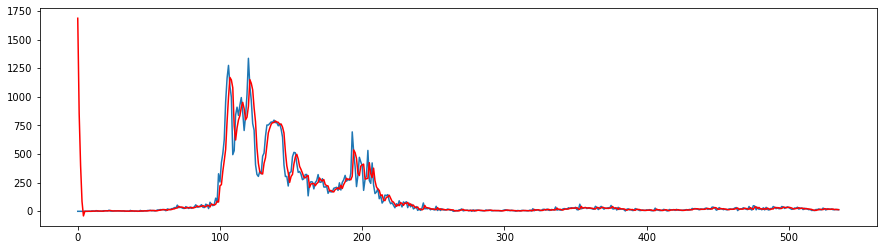

In [10]:
plt.figure(figsize=(15,4))
plt.plot(test_disc)
plt.plot(predictions_2, color='red')
plt.show()

In [11]:
x_lt = raw_data.Daily_Local_Transmission
lt_size = int(len(x_lt) * 0.80)
train_lt, test_lt = x_lt[size:], x_lt[:size]
history_3 = [xc for xc in train_lt]
predictions_3 = list()

# walk-forward validation
for t in range(len(test_lt)):
    model = ARIMA(history_3, order=(7, 1, 3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_3.append(yhat)
    obs = test_lt[t]
    history_3.append(obs)
    print('forecasted:%f, observed:%f' % (yhat, obs))
    
# evaluate forecasts
mse = mean_squared_error(test_lt, predictions_3)
rmse = np.sqrt(mean_squared_error(test_lt, predictions_3))
print('Mean Squared Error: %.2f' %mse)
print('Root Mean Square Error: %.2f' % rmse)

forecasted:1473.737511, observed:0.000000
forecasted:383.595605, observed:0.000000
forecasted:192.254121, observed:0.000000
forecasted:231.362600, observed:0.000000
forecasted:-154.342452, observed:0.000000
forecasted:17.491212, observed:4.000000
forecasted:-78.377157, observed:3.000000
forecasted:-521.456762, observed:2.000000
forecasted:-627.716283, observed:3.000000
forecasted:-328.219683, observed:7.000000
forecasted:79.914535, observed:3.000000
forecasted:220.419272, observed:1.000000
forecasted:189.307652, observed:2.000000
forecasted:-8.223263, observed:3.000000
forecasted:-175.300707, observed:8.000000
forecasted:-93.421969, observed:9.000000
forecasted:-15.702312, observed:5.000000
forecasted:58.667059, observed:3.000000
forecasted:68.135337, observed:1.000000
forecasted:26.469677, observed:4.000000
forecasted:-16.209878, observed:3.000000
forecasted:-32.226174, observed:1.000000
forecasted:-16.986200, observed:1.000000
forecasted:6.289934, observed:2.000000
forecasted:18.5826

forecasted:254.495449, observed:31.000000
forecasted:90.802304, observed:96.000000
forecasted:-37.890645, observed:79.000000
forecasted:-63.194023, observed:65.000000
forecasted:41.923501, observed:80.000000
forecasted:134.018750, observed:85.000000
forecasted:130.628311, observed:98.000000
forecasted:105.752485, observed:87.000000
forecasted:78.648350, observed:66.000000
forecasted:49.276751, observed:104.000000
forecasted:64.178673, observed:45.000000
forecasted:71.303753, observed:74.000000
forecasted:92.583817, observed:44.000000
forecasted:83.414485, observed:30.000000
forecasted:42.491489, observed:50.000000
forecasted:33.084562, observed:72.000000
forecasted:36.446306, observed:84.000000
forecasted:58.067174, observed:48.000000
forecasted:70.445059, observed:47.000000
forecasted:63.002573, observed:34.000000
forecasted:44.675969, observed:33.000000
forecasted:36.124095, observed:46.000000
forecasted:47.113559, observed:43.000000
forecasted:45.635245, observed:37.000000
forecaste

forecasted:0.859438, observed:0.000000
forecasted:0.358613, observed:0.000000
forecasted:0.521365, observed:0.000000
forecasted:0.704329, observed:0.000000
forecasted:-0.083758, observed:1.000000
forecasted:-0.028152, observed:1.000000
forecasted:0.354657, observed:0.000000
forecasted:0.345400, observed:0.000000
forecasted:0.427395, observed:0.000000
forecasted:0.207134, observed:0.000000
forecasted:0.136058, observed:0.000000
forecasted:0.311815, observed:0.000000
forecasted:0.051919, observed:0.000000
forecasted:-0.333496, observed:0.000000
forecasted:-0.368103, observed:0.000000
forecasted:-0.123964, observed:0.000000
forecasted:0.152305, observed:0.000000
forecasted:0.249256, observed:0.000000
forecasted:0.138973, observed:0.000000
forecasted:-0.047002, observed:1.000000
forecasted:0.245493, observed:1.000000
forecasted:0.595451, observed:0.000000
forecasted:0.547712, observed:0.000000
forecasted:0.438845, observed:0.000000
forecasted:0.066665, observed:1.000000
forecasted:0.382562

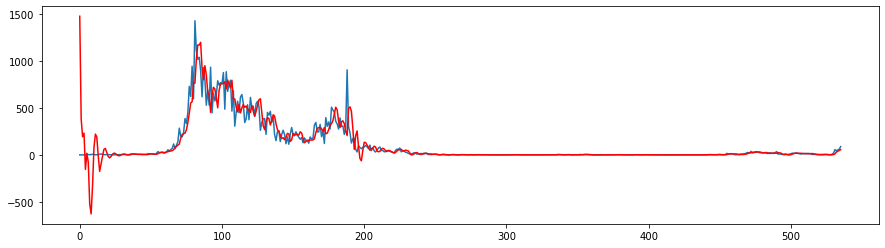

In [12]:
plt.figure(figsize=(15,4))
plt.plot(test_lt)
plt.plot(predictions_3, color='red')
plt.show()